In [156]:
# importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

df = pd.read_csv("dataset.csv")

In [157]:
# dropping these values as they have too many NaNs and zeros, not much to infer from them.
df = df.drop(['Evaporation','Sunshine','RISK_MM','Cloud3pm','Cloud9am'],axis=1)

In [158]:
# Available locations
print(df.Location.unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [159]:
# Will be using only these location for our analysis
locs = ['Sydney','Melbourne','Brisbane','Perth','Adelaide','Canberra','Hobart','Darwin','GoldCoast','Newcastle','Townsville']

ds = df.loc[(df.Location == 'Sydney') | (df.Location == 'Melbourne') | (df.Location == 'Brisbane')
            |(df.Location == 'Perth') |(df.Location == 'Adelaide') |(df.Location == 'Canberra')
            |(df.Location == 'Hobart')|(df.Location == 'Darwin')|(df.Location == 'GoldCoast')
            |(df.Location == 'NewCastle')|(df.Location == 'Townsville')]

In [160]:
# Data distribution in chosen location over the years 2007 - 2018
years = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
months = ['Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec','total']
count = pd.DataFrame([],index=years,columns=months)
m = 0
for i in locs:
    print('\n\n',i,'\n')
    data = df.loc[df.Location == i]
    for i in range(7,10):
        count.loc['200'+str(i),'total'] = (data.loc[(data.Date>= '200'+str(i)+'-00-00') & 
                                                      (data.Date<= '200'+str(i)+'-13-32')]).shape[0]
        for j in range(1,13):
            if(j//10):   
                count.loc['200'+str(i),months[j-1]] = (data.loc[(data.Date>= '200'+str(i)+'-'+str(j)+'-00') &
                                                              (data.Date<= '200'+str(i)+'-'+str(j)+'-32')]).shape[0]
            else:
                count.loc['200'+str(i),months[j-1]] = (data.loc[(data.Date>= '200'+str(i)+'-0'+str(j)+'-00') &
                                                              (data.Date<= '200'+str(i)+'-0'+str(j)+'-32')]).shape[0]

    for i in range(0,9):
        count.loc['201'+str(i),'total'] = (data.loc[(data.Date>= '201'+str(i)+'-00-00') & 
                                                      (data.Date<= '201'+str(i)+'-13-32')]).shape[0]
        for j in range(1,13):
            if(j//10):   
                count.loc['201'+str(i),months[j-1]] = (data.loc[(data.Date>= '201'+str(i)+'-'+str(j)+'-00') &
                                                              (data.Date<= '201'+str(i)+'-'+str(j)+'-32')]).shape[0]
            else:
                count.loc['201'+str(i),months[j-1]] = (data.loc[(data.Date>= '201'+str(i)+'-0'+str(j)+'-00') &
                                                              (data.Date<= '201'+str(i)+'-0'+str(j)+'-32')]).shape[0]
    print(count)
    



 Sydney 

      Jan  Feb  March  Apr  May  June  July  Aug  Sept  Oct  Nov  Dec  total
2007    0    0      0    0    0     0     0    0     0    0    0    0      0
2008    0   29     31   30   31    30    31   31    30   31   30   31    335
2009   31   28     31   30   31    30    31   31    30   31   30   31    365
2010   31   28     31   30   31    29    31   31    30   30   29   31    362
2011   31   28     31    0   31    30    31   31    30   31   30   31    335
2012   31   29     31   30   31    30    31   31    30   31   30    0    335
2013   31    0     31   30   31    30    31   31    30   31   30   31    337
2014   31   28     31   30   31    30    31   31    29   30   28   31    361
2015   31   28     31   30   31    30    31   31    30   31   30   31    365
2016   31   29     31   30   31    30    31   31    30   31   30   31    366
2017   31   28     31   30   31    25     0    0     0    0    0    0    176
2018    0    0      0    0    0     0     0    0     0    0    0

      Jan  Feb  March  Apr  May  June  July  Aug  Sept  Oct  Nov  Dec  total
2007    0    0      0    0    0     0     0    0     0    0    0    0      0
2008    0    0      0    0    0     0     0    0     0    0    0   31     31
2009   31   28     31   30   31    30    31   31    30   31   30   31    365
2010   31   28     31   30   31    30    31   31    30   25   30   31    359
2011   31   28     26    0   31    30    31   31    25   31   30   31    325
2012   31   29     20   30   31    30    26   31    30   31   29    0    318
2013   31    0     31   25   24    30    31   31    30   31   30   31    325
2014   31   28     28   26   31    30    31   31    30   31   30   30    357
2015   31   28     27   28   31    30    31   31    29   29   29   31    355
2016   31   21     31   30   31    30    31   31    30   30   30   28    354
2017   31   28     30   22   31    24     0    0     0    0    0    0    166
2018    0    0      0    0    0     0     0    0     0    0    0    0      0

In [161]:
# collecting dataset of each location
sydney = ds.loc[ds.Location == 'Sydney']
melbourne = ds.loc[ds.Location == 'Melbourne']
brisbane = ds.loc[ds.Location == 'Brisbane']
perth = ds.loc[ds.Location == 'Perth']
adelaide = ds.loc[ds.Location == 'Adelaide']
canberra = ds.loc[ds.Location == 'Canberra']
# print(sydney)

In [162]:
# collecting data for each location over the years 2008 - 2017
sydney = sydney.loc[(sydney.Date>= '2008-00-00') & (sydney.Date<= '2017-13-32')]
melbourne = melbourne.loc[(melbourne.Date>= '2008-00-00') & (melbourne.Date<= '2017-13-32')]
brisbane = brisbane.loc[(brisbane.Date>= '2008-00-00') & (brisbane.Date<= '2017-13-32')]
perth = perth.loc[(perth.Date>= '2008-00-00') & (perth.Date<= '2017-13-32')]
adelaide = adelaide.loc[(adelaide.Date>= '2008-00-00') & (adelaide.Date<= '2017-13-32')]
canberra = canberra.loc[(canberra.Date>= '2008-00-00') & (canberra.Date<= '2017-13-32')]

In [163]:
nums = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
        'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
categs = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

print(canberra.isna().sum())

Date               0
Location           0
MinTemp            5
MaxTemp            3
Rainfall          16
WindGustDir      329
WindGustSpeed    327
WindDir9am       536
WindDir3pm       228
WindSpeed9am     228
WindSpeed3pm     223
Humidity9am       61
Humidity3pm       12
Pressure9am      224
Pressure3pm      220
Temp9am           17
Temp3pm            7
RainToday         16
RainTomorrow       0
dtype: int64

In [164]:
# cleaning data

# replacing numerical NaN values with the mean values.
for i in nums:
    sydney[i] = sydney[i].astype(float).interpolate()
    melbourne[i] = melbourne[i].astype(float).interpolate()
    brisbane[i] = brisbane[i].astype(float).interpolate()
    perth[i] = perth[i].astype(float).interpolate()
    adelaide[i] = adelaide[i].astype(float).interpolate()
    canberra[i] = canberra[i].astype(float).interpolate()
    
# replcaing categorical NaN values with the previous values.
sydney = sydney.fillna(method='ffill')
sydney = sydney.fillna(method='ffill')
melbourne = melbourne.fillna(method='ffill')
brisbane = brisbane.fillna(method='ffill')
perth = perth.fillna(method='ffill')
adelaide = adelaide.fillna(method='ffill')
canberra = canberra.fillna(method='ffill')

print(canberra.isna().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [165]:
cleaned_data = pd.concat([sydney,melbourne,brisbane,perth,adelaide,canberra],ignore_index = True)
print(cleaned_data)

             Date  Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0      2008-02-01    Sydney     19.5     22.4      15.6         NaN   
1      2008-02-02    Sydney     19.5     25.6       6.0         NaN   
2      2008-02-03    Sydney     21.6     24.5       6.6         NaN   
3      2008-02-04    Sydney     20.2     22.8      18.8         NaN   
4      2008-02-05    Sydney     19.7     25.7      77.4         NaN   
...           ...       ...      ...      ...       ...         ...   
18568  2017-06-21  Canberra     -2.4     14.7       0.2         WSW   
18569  2017-06-22  Canberra     -0.4     13.9       0.0          NW   
18570  2017-06-23  Canberra     -2.9     13.3       0.4         NNW   
18571  2017-06-24  Canberra      0.1     14.4       0.0          NW   
18572  2017-06-25  Canberra     -4.3     14.5       0.0         WNW   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                NaN          S        SSW          17.0          20.0   

In [166]:
# SYDNEY: TEMPERATURE AND RAINFALL VISUALIZATION

years = ['2009','2010','2011','2012','2013','2014','2015','2016']
months = ['Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
Avg_temp = pd.DataFrame([],index=years,columns=months)
Rains = pd.DataFrame([],index=years,columns=months)
Humid = pd.DataFrame([],index=years,columns=months)
avg_temp = []
for i in range(1,13):
    if(i//10):
        m = sydney.loc[(sydney.Date>= '2009-'+str(i)+'-01') & (sydney.Date<= '2009-'+str(i)+'-31')]
    else:
        m = sydney.loc[(sydney.Date>= '2009-0'+str(i)+'-01') & (sydney.Date<= '2009-0'+str(i)+'-31')]
    Avg_temp.loc['2009',months[i-1]] = m['MaxTemp'].sum()/m.shape[0]
    Rains.loc['2009',months[i-1]] = m['Rainfall'].sum()/m.shape[0]
    Humid.loc['2009',months[i-1]] = m['Humidity9am'].sum()/m.shape[0]
    
for j in range(0,7):
    for i in range(1,13):
        if(i//10):
            m = sydney.loc[(sydney.Date>= '201'+str(j)+'-'+str(i)+'-01') & (sydney.Date<= '201'+str(j)+'-'+str(i)+'-31')]
        else:
            m = sydney.loc[(sydney.Date>= '201'+str(j)+'-0'+str(i)+'-01') & (sydney.Date<= '201'+str(j)+'-0'+str(i)+'-31')]
        Avg_temp.loc['201'+str(j),months[i-1]] = m['MaxTemp'].sum()/m.shape[0]
        Rains.loc['201'+str(j),months[i-1]] = m['Rainfall'].sum()/m.shape[0]
        Humid.loc['201'+str(j),months[i-1]] = m['Humidity9am'].sum()/m.shape[0]
        
# cleaning avergae temperature and rainfall by interpolating the NaN values
for i in months:
    Avg_temp[i] = Avg_temp[i].astype(float).interpolate()
    Rains[i] = Rains[i].astype(float).interpolate()
    Humid[i] = Humid[i].astype(float).interpolate()
           

c:\users\kavya s\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
c:\users\kavya s\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
c:\users\kavya s\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


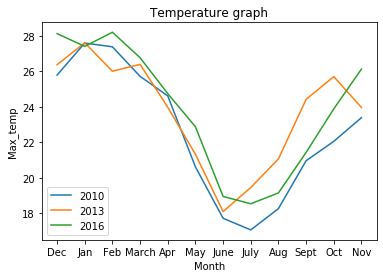

['Dec', 'Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']


In [310]:
# Temperature analysis for Sydney

cols = Avg_temp.columns.tolist()
cols.insert(0, cols.pop(cols.index('Dec')))
Avg_temp = Avg_temp.reindex(columns= cols)
# print(cols)

x = cols
for i in range(10,17,3):
    
    plt.plot(x, Avg_temp.loc['20'+str(i),:], label = '20'+str(i)) 
    

    # naming the x axis 
    plt.xlabel('Month') 
    # naming the y axis 
    plt.ylabel('Max_temp') 

    # giving a title to my graph 
    plt.title('Temperature graph') 

# function to show the plot 
plt.legend()
plt.show() 

In [211]:
# # Humidity analysis for Sydney

# cols = Humid.columns.tolist()
# cols.insert(0, cols.pop(cols.index('Dec')))
# Humid = Humid.reindex(columns= cols)
# # print(Humid)

# x = cols
# for i in range(10,17,3):
    
#     plt.plot(x, Humid.loc['20'+str(i),:], label = '20'+str(i)) 

#     # naming the x axis 
#     plt.xlabel('Month') 
#     # naming the y axis 
#     plt.ylabel('Average Humidity') 

#     # giving a title to my graph 
#     plt.title('Humidity graph') 

# # function to show the plot 
# plt.legend()
# plt.show() 

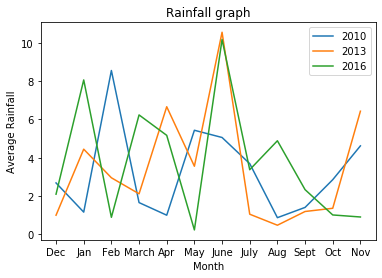

['Dec', 'Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']


In [311]:
# Rainfall analysis for Sydney

# Rainfall in Australia is highly variable, largely because 
# of large-scale atmospheric and oceanic drivers that affect the region.

# print(Rains)
cols = Rains.columns.tolist()
cols.insert(0, cols.pop(cols.index('Dec')))
Rains = Rains.reindex(columns= cols)
# print(cols)

x = cols
for i in range(10,17,3):
    
    plt.plot(x, Rains.loc['20'+str(i),:], label = '20'+str(i)) 

    # naming the x axis 
    plt.xlabel('Month') 
    # naming the y axis 
    plt.ylabel('Average Rainfall') 

    # giving a title to my graph 
    plt.title('Rainfall graph') 

# function to show the plot 
plt.legend()
plt.show() 

In [214]:
# Rainfall distribution for Australia in specific locations

locs = ['Sydney','Melbourne','Brisbane','Perth','Adelaide','Canberra']
years = ['2009','2010','2011','2012','2013','2014','2015','2016']

rainfall = pd.DataFrame([],columns=years,index=locs)

for i in years:
    for j in locs:
        m = cleaned_data.loc[(cleaned_data.Location == j) & (cleaned_data.Date>= str(i)+'-00-01') & (cleaned_data.Date<= str(i)+'-13-31')]
        rainfall.loc[j,str(i)] = m['Rainfall'].sum()/m.shape[0]

for i in locs:
    m = rainfall.loc[i,:]
    rainfall.loc[i,'total'] = (m.sum()/m.shape[0])
print(rainfall)


              2009     2010     2011     2012     2013     2014     2015  \
Sydney     2.61973  3.19917  3.47164  3.37194  3.49852  2.48753   3.6663   
Melbourne  1.27342  2.12767   3.1089  2.47192  2.51472  1.88125     1.12   
Brisbane   2.95912  4.57673  3.25982  3.39671  2.53423  2.18453  4.09916   
Perth       1.6663  1.38027  2.51164  1.75522  2.31929  1.84767   1.6926   
Adelaide   1.44199  1.70613  1.56615  1.63956  1.61726  1.54046  1.09917   
Canberra   1.20603  2.63681  1.71804  2.03533  1.49496  1.47493  1.51717   

              2016     total  
Sydney     3.78579  3.262578  
Melbourne  1.88374  1.820180  
Brisbane   2.04187  2.783574  
Perth      1.95574  1.680971  
Adelaide   2.24262  1.428149  
Canberra   2.15355  1.581870  


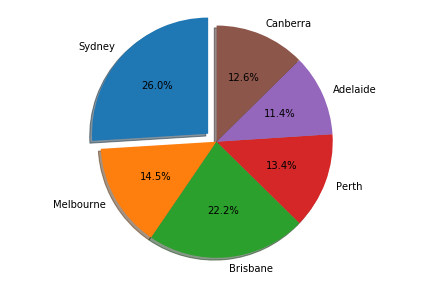

In [299]:
# Pie chart for rainfall distribution

plt.pie(
    # using data total)arrests
    rainfall['total'],
    # with the labels being officer names
    labels=locs,
    # with no shadows
    shadow=True,
    # with colors
#     colors=colors,
    # with one slide exploded out
    explode=(0.1,0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [180]:
# Pie chart for rainfall distribution over all locations

# df1 = df[['Date','Location','Rainfall']]
# print(df1.isna().sum())
# df1['Rainfall'] = df1['Rainfall'].astype('float').interpolate()
# # df1.isna().sum()
# # print(df1)

# locations = df1.Location.unique()

# rf = pd.DataFrame([],columns=years,index=locations)

# for i in years:
#     for j in locations:
#         m = df1.loc[(df1.Location == j) & (df1.Date>= str(i)+'-00-01') & (df1.Date<= str(i)+'-13-31')]
#         rf.loc[j,str(i)] = m['Rainfall'].sum()/m.shape[0]

# for i in locations:
#     m = rf.loc[i,:]
#     rf.loc[i,'total'] = (m.sum()/m.shape[0])

# plt.pie(
#     # using data total)arrests
#     rf['total'],
#     # with the labels being officer names
#     labels=locations,
#     # with no shadows
#     shadow=True,
# #     with the start angle at 90%
#     startangle=90,
# #     with the percent listed as a fraction
#     autopct='%1.1f%%',
#     )

# # View the plot drop above
# plt.axis('equal')

# # View the plot
# plt.tight_layout()
# plt.show()

In [317]:
# print(Avg_temp)
# print(Humid)

x = ['Dec','Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov']

In [316]:
# fig, ax1 = plt.subplots()

# plt.bar(x, Avg_temp.loc['2013',:])

# # naming the x axis 
# plt.xlabel('Month') 
# # naming the y axis 
# plt.ylabel('Max_temp') 

# # giving a title to my graph 
# plt.title('Temperature graph') 

# plt.plot(x, Humid.loc['2013',:], label = '2013') 
# # function to show the plot 
# plt.show() 

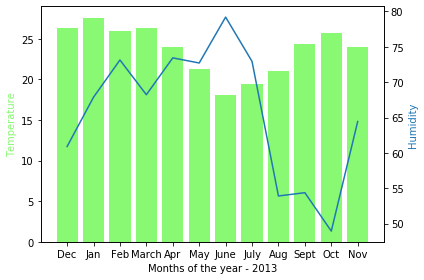

In [315]:
fig, ax1 = plt.subplots()

color = '#89F873'
ax1.set_xlabel('Months of the year - 2013')
ax1.set_ylabel('Temperature', color=color)
ax1.bar(x, Avg_temp.loc['2013',:], color = color)
ax1.tick_params(axis='y')
  
# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Humidity', color = color)
ax2.plot(x, Humid.loc['2013',:], color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [281]:
s = sydney
s['Winds'] = ((s['WindSpeed9am'] + s['WindSpeed3pm'])/2)**2
s['Pressures'] = ((s['Pressure9am'] + s['Pressure3pm'])/2)
s['Humids'] =  ((s['Humidity9am'] + s['Humidity3pm'])/2)

# s.corr(method = 'pearson')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Winds,Pressures,Humids
MinTemp,1.000000,0.771123,0.012457,0.145587,-0.296366,0.223602,0.055462,0.271415,-0.392995,-0.355685,0.939160,0.753125,-0.032076,-0.377905,0.183958
MaxTemp,0.771123,1.000000,-0.140098,0.083484,-0.347324,0.150032,-0.183969,-0.151475,-0.390205,-0.425335,0.859222,0.960474,-0.124297,-0.411701,-0.183511
Rainfall,0.012457,-0.140098,1.000000,0.166214,0.155363,0.039476,0.330799,0.301581,-0.037664,0.002090,-0.056151,-0.143685,0.151389,-0.017932,0.346620
WindGustSpeed,0.145587,0.083484,0.166214,1.000000,0.293372,0.579860,-0.272724,-0.119369,-0.472372,-0.407399,0.184107,0.039381,0.595928,-0.444133,-0.213118
WindSpeed9am,-0.296366,-0.347324,0.155363,0.293372,1.000000,0.199756,-0.196060,-0.152960,0.002597,0.089375,-0.331266,-0.348427,0.746006,0.046482,-0.190745
WindSpeed3pm,0.223602,0.150032,0.039476,0.579860,0.199756,1.000000,-0.289237,-0.133408,-0.329136,-0.273779,0.276822,0.130214,0.755799,-0.304313,-0.228834
Humidity9am,0.055462,-0.183969,0.330799,-0.272724,-0.196060,-0.289237,1.000000,0.657966,0.262194,0.248196,-0.144974,-0.154440,-0.306133,0.257633,0.903260
Humidity3pm,0.271415,-0.151475,0.301581,-0.119369,-0.152960,-0.133408,0.657966,1.000000,0.155583,0.182408,0.129365,-0.213231,-0.173778,0.170633,0.917443
Pressure9am,-0.392995,-0.390205,-0.037664,-0.472372,0.002597,-0.329136,0.262194,0.155583,1.000000,0.962195,-0.419008,-0.347518,-0.247114,0.990480,0.227182
Pressure3pm,-0.355685,-0.425335,0.002090,-0.407399,0.089375,-0.273779,0.248196,0.182408,0.962195,1.000000,-0.403295,-0.392637,-0.154459,0.990528,0.235070


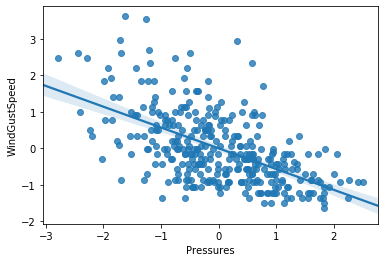

In [343]:
da = s.loc[(s.Date>= '2013-00-01') & (s.Date<= '2013-13-32')]

xx = da['Pressures']
x = (xx-xx.mean())/xx.std()
yy = da['WindGustSpeed']
y = (yy-yy.mean())/yy.std()
sns.regplot(x,y)
plt.show()

In [344]:
x.corr(y)

-0.5695992998527029

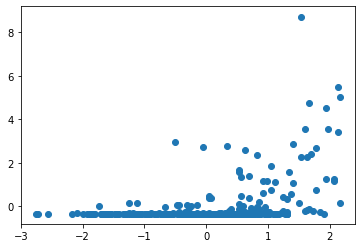

In [346]:
xx = da['Humids']
x = (xx-xx.mean())/xx.std()
yy = da['Rainfall']
y = (yy-yy.mean())/yy.std()
plt.scatter(x,y)
plt.show()

In [347]:
x.corr(y)

0.41779510388035945

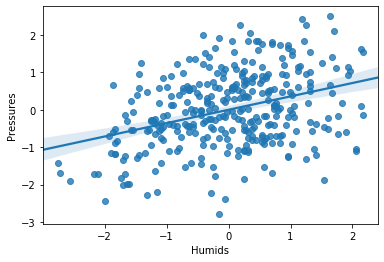

In [348]:
xx = da['Humids']
x = (xx-xx.mean())/xx.std()
yy = da['Pressures']
y = (yy-yy.mean())/yy.std()
sns.regplot(x,y)
plt.show()

In [349]:
x.corr(y)

0.35745858764507116

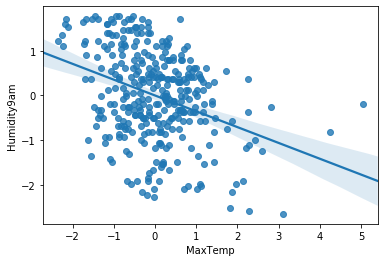

In [350]:
xx = da['MaxTemp']
x = (xx-xx.mean())/xx.std()
yy = da['Humidity9am']
y = (yy-yy.mean())/yy.std()
sns.regplot(x,y)
plt.show()

In [351]:
x.corr(y)

-0.3529150791083767